In this notebook, we perform a very quick EDA to explore the [Ford Car Price Prediction](https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction) dataset we're using for this project and identify the data cleaning steps we need to perform before creating a baseline model.

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv("../data/ford.csv")

In [87]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


We have 7 features and no missing values.

In [89]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


## Data distribution

First, we check the distributation of the target variable.

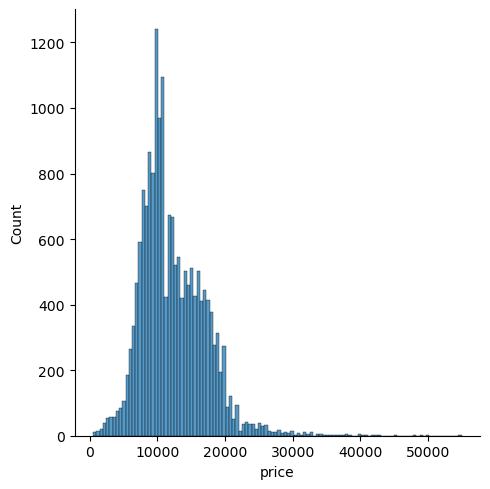

In [91]:
sns.displot(x="price", data=df)

We note a few outliers but the distribution of the target is kind of normal.

Now, we take a quick look at other variables.

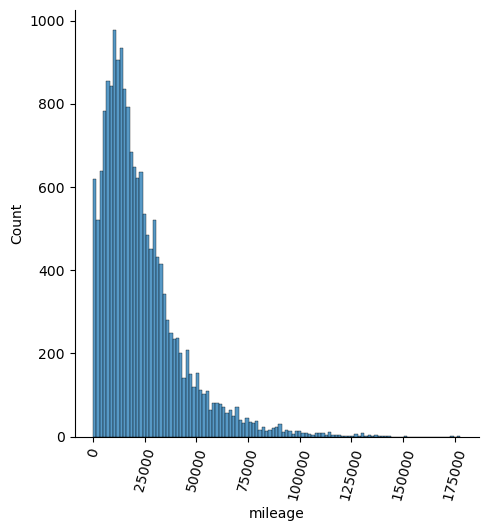

In [102]:
sns.displot(x="mileage", data=df)
plt.xticks(rotation=75);

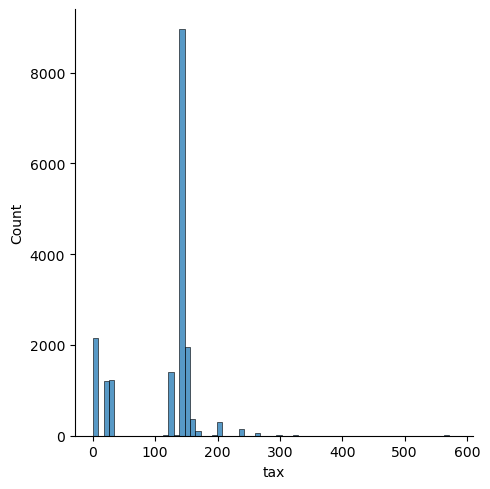

In [93]:
sns.displot(x="tax", data=df)

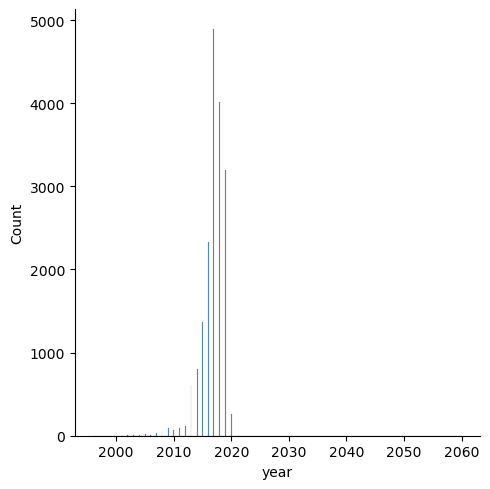

In [94]:
sns.displot(x="year", data=df)

<AxesSubplot:xlabel='count', ylabel='engineSize'>

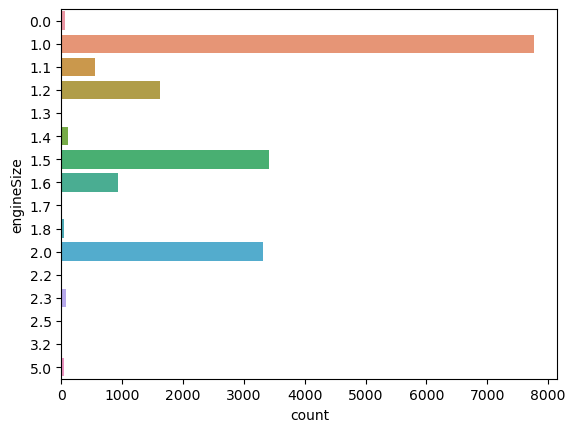

In [113]:
sns.countplot(y="engineSize", data=df)

<AxesSubplot:xlabel='count', ylabel='model'>

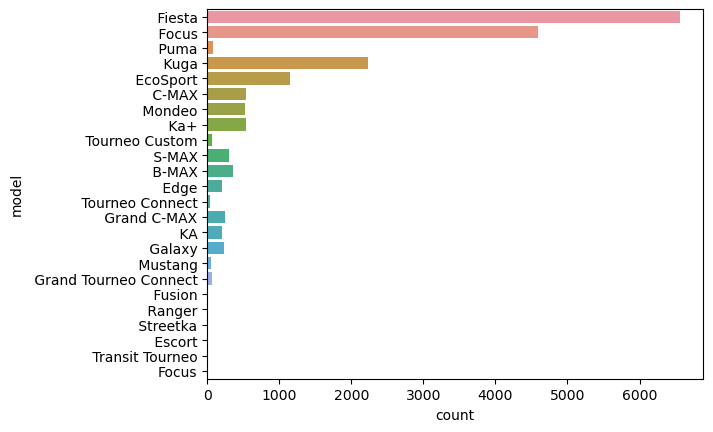

In [97]:
sns.countplot(y="model", data=df)

The plot above looks suspicious because we have twice the model Focus. We investigate further:

In [98]:
df['model'].value_counts()

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: model, dtype: int64

In [99]:
df['model'].nunique()

24

In [115]:
# Remove white spaces
df['model'] = df['model'].str.replace("\s+", "", regex=True)

# Convert text to lowercase
df['model'] = df['model'].str.lower()

In [116]:
df['model'].nunique()

23

<AxesSubplot:xlabel='count', ylabel='transmission'>

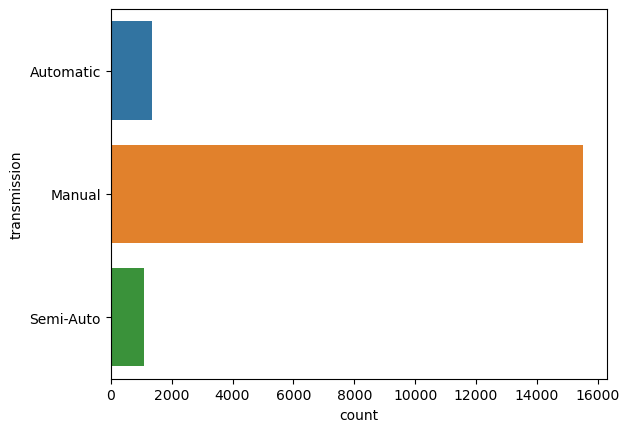

In [100]:
sns.countplot(y='transmission', data=df)

Now, let's see if there's some interesting correlation among the numeric features:

/var/folders/4t/35nfm0b159g9bz03rt5zzm_h0000gn/T/ipykernel_44554/2964193759.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr();


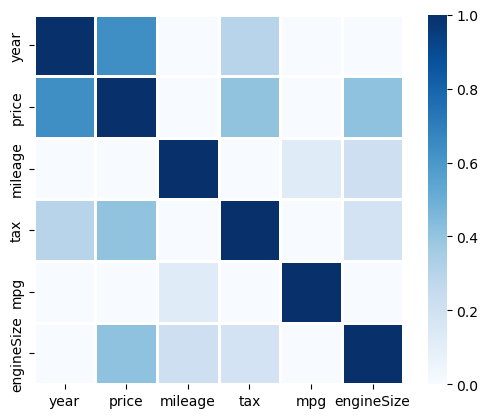

In [105]:
corr = df.corr();

sns.heatmap(corr, vmin=0, vmax=1, linewidths=2, square=True, cmap='Blues');

Notice that price is correlated with engineSize, tax, and year. However, tax is correlated with year so for a baseline model we'll only use year.

Now, we explore the relationship among price and the categorical variables.

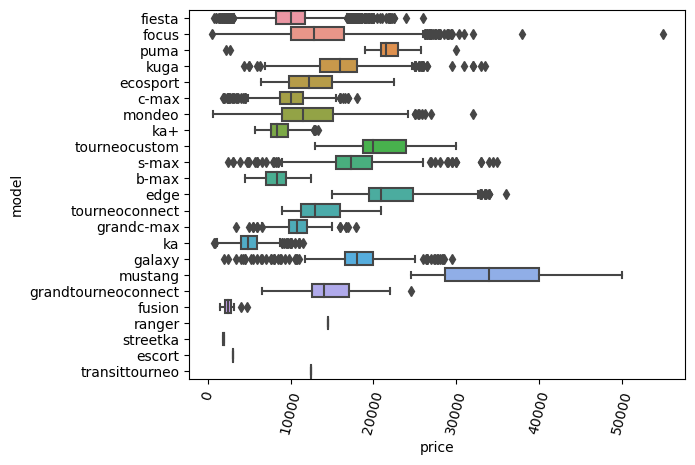

In [117]:
sns.boxplot(x='price', y='model', data=df)
plt.xticks(rotation=75);

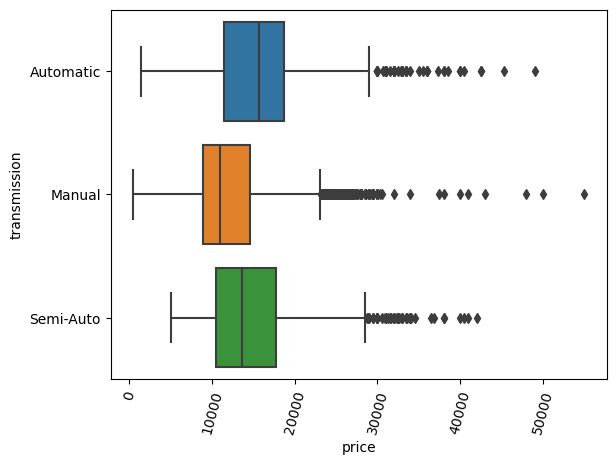

In [110]:
sns.boxplot(x='price', y='transmission', data=df)
plt.xticks(rotation=75);

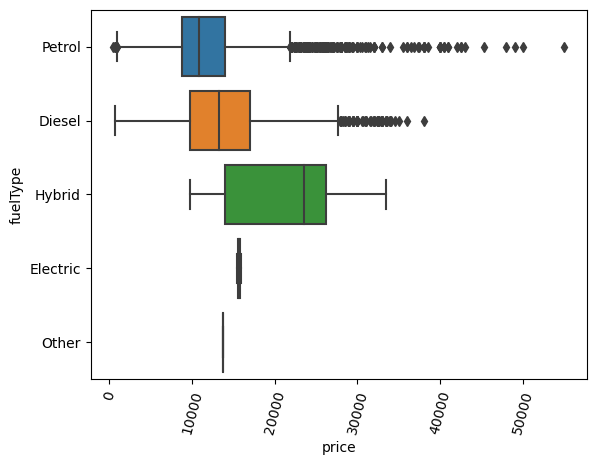

In [114]:
sns.boxplot(x='price', y='fuelType', data=df)
plt.xticks(rotation=75);

## Outlier analysis

Now, we look further into outliers.

In [121]:
df[df.year > 2022]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17726,fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4


## Summary
After performing a very quick EDA to the dataset, we came up with the following insights:

* The dataset has no missing values.
* It contains some outliers that we need to study further.
* We can create a baseline model with the following features:
  * year (numerical) - remove the outlier we found above
  * engineSize (numerical)
  * fuelType (categorical)